In [163]:
import os
import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from lidar_processing import lidar_processor, ljx_processor

Core_000_Box_000_of_000_Part_1_of_3 created
1 Lidar Processors created


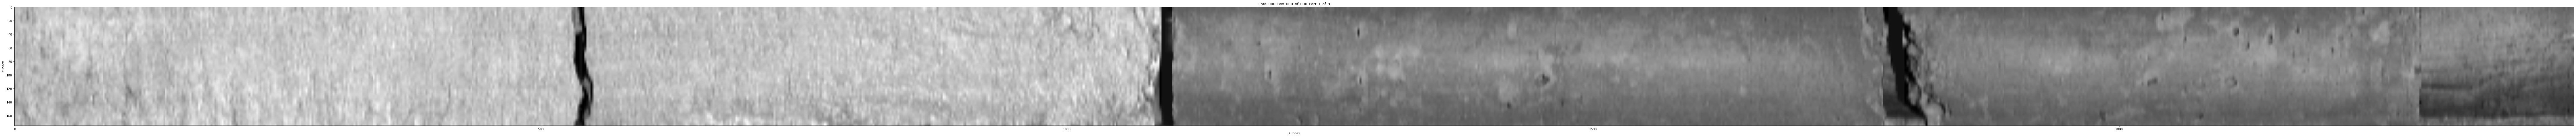

In [210]:
root_dir = r"C:\Users\eashenhurst\Desktop\local scans\concrete_core\concrete_split"
filter = "1_"

paths_list = []
for root, dirs, files in os.walk(root_dir):
        for dir_name in dirs:
                folder = os.path.join(root,dir_name)
                if filter in folder:
                    paths_list.append(folder)

processors = []
for folder in paths_list:
        try:
            processor = lidar_processor(folder, window_size = 14.75, name = (folder.split("\\")[-1]), y_shift = -3)
        except FileNotFoundError as e:
            print(f"   Error: {e}")
        else:  
            processors.append(processor)
            print(f"{processor.name} created")

print(f"{len(processors)} Lidar Processors created")
v_list1 = []
for LP in processors:
    LP._plot_intensity_cloud()
    v_list1.extend(LP._get_moment_space())

Core_000_Box_000_of_000_Part_2_of_3 created
1 Lidar Processors created


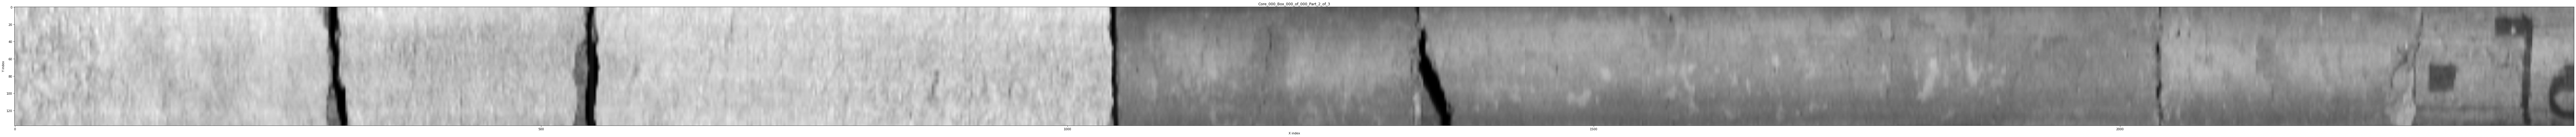

In [165]:
root_dir = r"C:\Users\eashenhurst\Desktop\local scans\concrete_core\concrete_split"
filter = "2_"

paths_list = []
for root, dirs, files in os.walk(root_dir):
        for dir_name in dirs:
                folder = os.path.join(root,dir_name)
                if filter in folder:
                    paths_list.append(folder)

processors = []
for folder in paths_list:
        try:
            processor = lidar_processor(folder, window_size = 10.5, name = (folder.split("\\")[-1]))
        except FileNotFoundError as e:
            print(f"   Error: {e}")
        else:  
            processors.append(processor)
            print(f"{processor.name} created")

print(f"{len(processors)} Lidar Processors created")
v_list2 = []
for LP in processors:
    LP._plot_intensity_cloud()
    v_list2.extend(LP._get_moment_space())

Core_000_Box_000_of_000_Part_3_of_3 created
1 Lidar Processors created


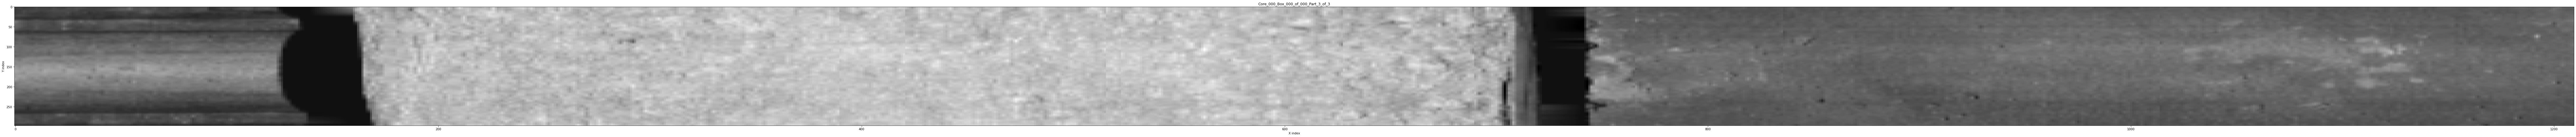

In [200]:
root_dir = r"C:\Users\eashenhurst\Desktop\local scans\concrete_core\concrete_split"
filter = "3_"

paths_list = []
for root, dirs, files in os.walk(root_dir):
        for dir_name in dirs:
                folder = os.path.join(root,dir_name)
                if filter in folder:
                    paths_list.append(folder)

processors = []
for folder in paths_list:
        try:
            processor = lidar_processor(folder, window_size = 28.5, name = (folder.split("\\")[-1]), y_shift = 7)
        except FileNotFoundError as e:
            print(f"   Error: {e}")
        else:  
            processors.append(processor)
            print(f"{processor.name} created")

print(f"{len(processors)} Lidar Processors created")

v_list3 = []
for LP in processors:
    LP._plot_intensity_cloud()
    v_list3.extend(LP._get_moment_space())

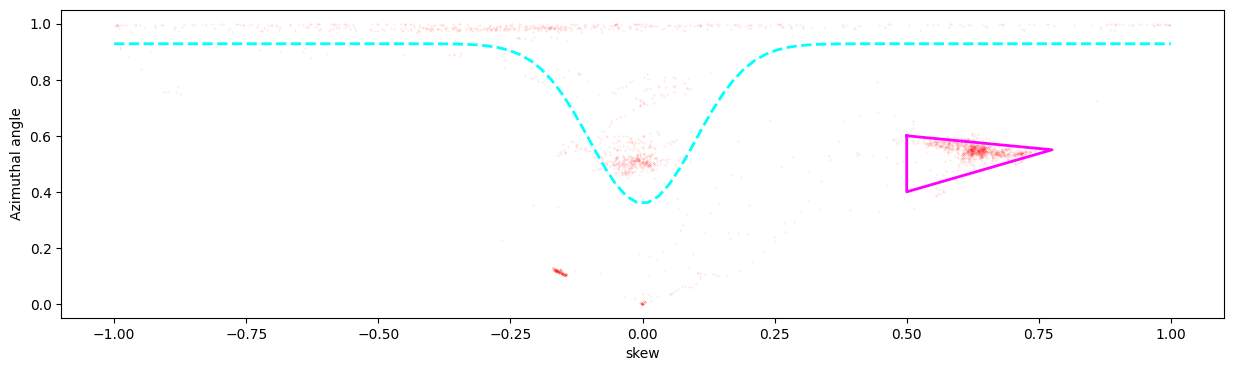

In [211]:
import numpy as np

fig = plt.figure(figsize=(15, 4), dpi=100)
gs = fig.add_gridspec(1, 1)
ax = fig.add_subplot(gs[0, 0])

v_list = v_list1


x_vals = [v[2] for v in v_list]
y_vals = [v[3] for v in v_list]

ax.set_xlabel("skew")
ax.set_ylabel("Azimuthal angle")

ax.scatter(x_vals, y_vals, color="red", s=0.05, alpha = 0.25)

a = 0.1
s = 7
t = 6.5
x_func = np.linspace(-1, 1, 100)
y_func = (t - (1 / np.sqrt(2 * np.pi * a**2)) * np.exp(-((x_func)**2) / (2 * a**2))) / s

ax.plot(x_func, y_func, color='cyan', linestyle='--', linewidth=2, label="gauss")

triangle_x = [0.5, 0.775, 0.5, 0.5]
triangle_y = [0.6, 0.55, 0.4, 0.6]

ax.plot(triangle_x, triangle_y, color='magenta', linestyle='-', linewidth=2, label="Triangle")



plt.show()

In [214]:
import plotly.graph_objects as go

ds_f = 1

def extract_xyzc(v_list, color):
    x = [v[1] for v in v_list][::ds_f]
    y = [v[2] for v in v_list][::ds_f]
    z = [v[3] for v in v_list][::ds_f]
    c = [color] * len(x)
    return x, y, z, c

# Extract and assign uniform colors
x1, y1, z1, c1 = extract_xyzc(v_list1, 'blue')
x2, y2, z2, c2 = extract_xyzc(v_list2, 'green')
x3, y3, z3, c3 = extract_xyzc(v_list3, 'black')

fig = go.Figure(data=[
    go.Scatter3d(x=x1, y=y1, z=z1, mode='markers',
                 marker=dict(size=2, color=c1, opacity=0.75), name='v_list1'),
    go.Scatter3d(x=x2, y=y2, z=z2, mode='markers',
                 marker=dict(size=2, color=c2, opacity=0.75), name='v_list2'),
    go.Scatter3d(x=x3, y=y3, z=z3, mode='markers',
                 marker=dict(size=2, color=c3, opacity=0.75), name='v_list3')
])

fig.update_layout(
    title="3D Scatter of Vectors",
    scene=dict(
        xaxis_title="mean",
        yaxis_title="skew",
        zaxis_title="azimuthal angle",
        camera=dict(projection=dict(type="orthographic"))
    ),
    width=1500,
    height=1500
)

fig.show()
